In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from numpy import loadtxt
from numpy import sort
from random import sample
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.utils import resample
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import MultinomialNB

In [2]:
print(os.listdir())

['.ipynb_checkpoints', 'corporate_rating.csv', 'idmproject (1).ipynb']


In [3]:
df = pd.read_csv (r'C:\Users\pc\Downloads\corporate_rating.csv')

In [4]:
df

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,BBB,"NVR, Inc.",NVR,Moody's Investors Service,9/5/2012,Capital Goods,11.757767,7.115059,7.057420,1.079762,...,0.343500,0.953231,50.293155,230.194971,1.759461,0.086376,15.867701,52.760726,0.083018,15.758348
2025,BB,Kaiser Aluminum Corporation,KALU,Standard & Poor's Ratings Services,4/28/2016,Capital Goods,2.962788,1.294743,0.428234,30.602414,...,0.363636,0.602645,5.563630,5.958956,1.614282,-0.267117,-4.729967,9.232021,0.114089,14.542373
2026,B,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,11/30/2012,Finance,0.883875,0.842553,0.233830,147.599372,...,35.017544,0.926665,1.459801,1.056480,4.034952,0.265092,9.358311,1.575328,0.283634,2.300168
2027,B,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,6/15/2012,Finance,0.911713,0.748356,0.310640,131.644566,...,0.331525,0.692804,0.744377,1.470201,3.825856,0.130692,22.440102,1.074441,0.217783,1.997608


In [5]:
df.isnull().sum()

Rating                                0
Name                                  0
Symbol                                0
Rating Agency Name                    0
Date                                  0
Sector                                0
currentRatio                          0
quickRatio                            0
cashRatio                             0
daysOfSalesOutstanding                0
netProfitMargin                       0
pretaxProfitMargin                    0
grossProfitMargin                     0
operatingProfitMargin                 0
returnOnAssets                        0
returnOnCapitalEmployed               0
returnOnEquity                        0
assetTurnover                         0
fixedAssetTurnover                    0
debtEquityRatio                       0
debtRatio                             0
effectiveTaxRate                      0
freeCashFlowOperatingCashFlowRatio    0
freeCashFlowPerShare                  0
cashPerShare                          0


In [6]:
df.head

<bound method NDFrame.head of      Rating                         Name Symbol  \
0         A        Whirlpool Corporation    WHR   
1       BBB        Whirlpool Corporation    WHR   
2       BBB        Whirlpool Corporation    WHR   
3       BBB        Whirlpool Corporation    WHR   
4       BBB        Whirlpool Corporation    WHR   
...     ...                          ...    ...   
2024    BBB                    NVR, Inc.    NVR   
2025     BB  Kaiser Aluminum Corporation   KALU   
2026      B       Cresud S.A.C.I.F. y A.  CRESY   
2027      B       Cresud S.A.C.I.F. y A.  CRESY   
2028    CCC       Cresud S.A.C.I.F. y A.  CRESY   

                      Rating Agency Name        Date             Sector  \
0             Egan-Jones Ratings Company  11/27/2015  Consumer Durables   
1             Egan-Jones Ratings Company   2/13/2014  Consumer Durables   
2                          Fitch Ratings    3/6/2015  Consumer Durables   
3                          Fitch Ratings   6/15/2012  Con

In [7]:
df.head

<bound method NDFrame.head of      Rating                         Name Symbol  \
0         A        Whirlpool Corporation    WHR   
1       BBB        Whirlpool Corporation    WHR   
2       BBB        Whirlpool Corporation    WHR   
3       BBB        Whirlpool Corporation    WHR   
4       BBB        Whirlpool Corporation    WHR   
...     ...                          ...    ...   
2024    BBB                    NVR, Inc.    NVR   
2025     BB  Kaiser Aluminum Corporation   KALU   
2026      B       Cresud S.A.C.I.F. y A.  CRESY   
2027      B       Cresud S.A.C.I.F. y A.  CRESY   
2028    CCC       Cresud S.A.C.I.F. y A.  CRESY   

                      Rating Agency Name        Date             Sector  \
0             Egan-Jones Ratings Company  11/27/2015  Consumer Durables   
1             Egan-Jones Ratings Company   2/13/2014  Consumer Durables   
2                          Fitch Ratings    3/6/2015  Consumer Durables   
3                          Fitch Ratings   6/15/2012  Con

In [8]:
df.head(5)  # printing initial values 

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


In [9]:
df.Rating.value_counts() # checking for the number of every ratings present in the data 

BBB    671
BB     490
A      398
B      302
AA      89
CCC     64
AAA      7
CC       5
C        2
D        1
Name: Rating, dtype: int64

In [10]:
df_dict = {'AAA':'Lowest Risk', 
               'AA':'Low Risk',
               'A':'Low Risk',
               'BBB':'Medium Risk', 
               'BB':'High Risk',
               'B':'High Risk',
               'CCC':'Highest Risk', 
               'CC':'Highest Risk',
               'C':'Highest Risk',
               'D':'Default'}

df.Rating = df.Rating.map(df_dict)   # updating dictionary and replacing the ratings with corresponding risk

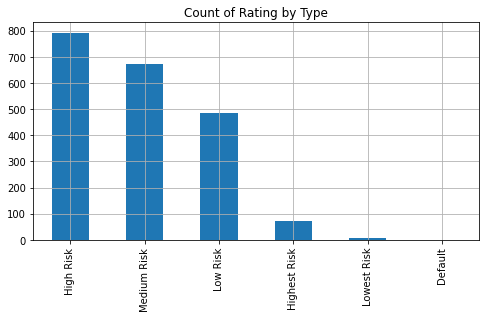

In [11]:
ax = df['Rating'].value_counts().plot(kind='bar',
                                     figsize=(8,4),
                                     title="Count of Rating by Type",
                                     grid=True)   # visually representation of count of rating by type

In [12]:
df = df[df['Rating']!='Lowest Risk']
df = df[df['Rating']!='Default'] 
df.reset_index(inplace = True, drop=True)  # filtering lowest risk and default and updating indexes

In [13]:
df.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,2.021000e+03,2.021000e+03,2021.000000,2021.000000,2021.000000,2.021000e+03,2021.000000,2021.000000
mean,3.535411,2.657150,0.669048,334.855415,0.278725,0.432721,0.496900,0.588793,-37.666843,-74.267283,...,0.400755,0.408272,5.114871e+03,4.244248e+03,3.335166,0.438715,48.426558,6.540891e+03,1.452142,38.138233
std,44.139386,33.009920,3.590902,4456.606352,6.076128,9.002733,0.525996,11.246798,1168.476782,2354.920503,...,10.613711,3.803929,1.472059e+05,1.226418e+05,87.702375,9.002047,530.161001,1.778797e+05,19.521704,760.421855
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,...,-100.611016,-120.916010,-4.912742e+03,-1.915035e+01,-2555.419643,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850
25%,1.071930,0.602298,0.131433,22.806507,0.020894,0.025649,0.232565,0.044546,0.018757,0.028112,...,0.147837,0.269616,4.094118e-01,1.562116e+00,2.050249,0.028057,6.235759,2.348851e+00,0.073664,2.202394
50%,1.492804,0.979094,0.297859,42.281804,0.064323,0.084965,0.414217,0.107640,0.045417,0.074639,...,0.300439,0.644265,2.123062e+00,3.680425e+00,2.657275,0.087424,9.269746,4.361649e+00,0.132758,5.775840
75%,2.160710,1.450457,0.625355,59.165369,0.113871,0.144763,0.849693,0.175334,0.077159,0.135036,...,0.370239,0.836949,4.230253e+00,8.027524e+00,3.665438,0.149355,12.898855,7.322553e+00,0.239359,9.500424
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,...,429.926282,34.594086,5.753380e+06,4.786803e+06,2562.871795,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400


In [14]:
attribute_list = list(df.columns[6:31])
attribute_list = sample(attribute_list,4) 
print(attribute_list) # plotting some variables randomly to check for outliers and skewness because of it 

['quickRatio', 'debtEquityRatio', 'fixedAssetTurnover', 'netProfitMargin']


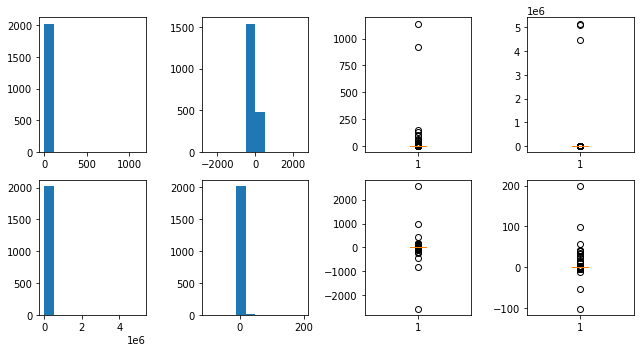

In [15]:
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(9,5))

axes[0, 0].hist(df[attribute_list[0]])
axes[0, 1].hist(df[attribute_list[1]])
axes[1, 0].hist(df[attribute_list[2]])
axes[1, 1].hist(df[attribute_list[3]])

axes[0, 2].boxplot(df[attribute_list[0]])
axes[1, 2].boxplot(df[attribute_list[1]])
axes[0, 3].boxplot(df[attribute_list[2]])
axes[1, 3].boxplot(df[attribute_list[3]])

figure.tight_layout()

In [16]:
df.skew(axis=0) # checking for normally distributed columns

currentRatio                          34.271115
quickRatio                            30.864610
cashRatio                             27.046952
daysOfSalesOutstanding                20.359098
netProfitMargin                       17.585073
pretaxProfitMargin                    22.052558
grossProfitMargin                    -14.198688
operatingProfitMargin                 26.441502
returnOnAssets                       -32.049111
returnOnCapitalEmployed              -33.252701
returnOnEquity                        31.639845
assetTurnover                         25.968848
fixedAssetTurnover                    26.068762
debtEquityRatio                        0.268074
debtRatio                              1.284256
effectiveTaxRate                      32.265705
freeCashFlowOperatingCashFlowRatio   -22.868222
freeCashFlowPerShare                  33.610677
cashPerShare                          33.958646
companyEquityMultiplier                0.268175
ebitPerRevenue                        22

In [17]:
for c in df.columns[6:31]:  # calculating percentage of outliers in each column by using box plot definition

    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    iqr = q3 - q1 #Interquartile range
    low  = q3-1.5*iqr
    high = q1+1.5*iqr
    lower_out = len(df.loc[(df[c] < low)  ,c])
    upper_out = len(df.loc[(df[c] > high)  ,c])
    outlier_count = upper_out+lower_out
    prop_out = outlier_count/len(df)
    print(c, ": "+"{:.2%}".format(prop_out))

currentRatio : 18.01%
quickRatio : 19.05%
cashRatio : 14.84%
daysOfSalesOutstanding : 23.55%
netProfitMargin : 25.09%
pretaxProfitMargin : 24.49%
grossProfitMargin : 0.99%
operatingProfitMargin : 22.12%
returnOnAssets : 24.25%
returnOnCapitalEmployed : 22.07%
returnOnEquity : 28.70%
assetTurnover : 15.83%
fixedAssetTurnover : 13.46%
debtEquityRatio : 22.07%
debtRatio : 21.33%
effectiveTaxRate : 28.06%
freeCashFlowOperatingCashFlowRatio : 16.92%
freeCashFlowPerShare : 23.55%
cashPerShare : 17.12%
companyEquityMultiplier : 22.02%
ebitPerRevenue : 24.34%
enterpriseValueMultiple : 23.70%
operatingCashFlowPerShare : 17.66%
operatingCashFlowSalesRatio : 16.87%
payablesTurnover : 14.45%


In [18]:
df_outlier = df.copy()  # making a clone dataframe to check for outliers in row 

for c in df_outlier.columns[6:31]:
    
    q1 = df_outlier[c].quantile(0.25)
    q3 = df_outlier[c].quantile(0.75)
    iqr = q3 - q1 #Interquartile range
    fence_low  = q3-1.5*iqr
    fence_high = q1+1.5*iqr
    
    for i in range(len(df_outlier)):
        
        if df.loc[i,c] < fence_low or df.loc[i,c] > fence_high: # if Outlier
            
            df_outlier.loc[i,c] = 1
        
        else:
            df_outlier.loc[i,c] = 0

In [19]:
df_outlier.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,Low Risk,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Medium Risk,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Medium Risk,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Medium Risk,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Medium Risk,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


<AxesSubplot:>

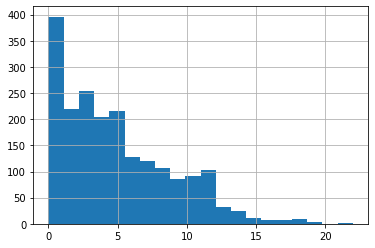

In [20]:
df_outlier["total"] = df_outlier.sum(axis=1)
df_outlier.total.hist(bins = 20)

In [21]:

min_max_scaler = preprocessing.MinMaxScaler()

for c in df.columns[6:31]:

    df[[c]] = min_max_scaler.fit_transform(df[[c]].to_numpy())*1000
    df[[c]] = df[c].apply(lambda x: np.log10(x+0.01))

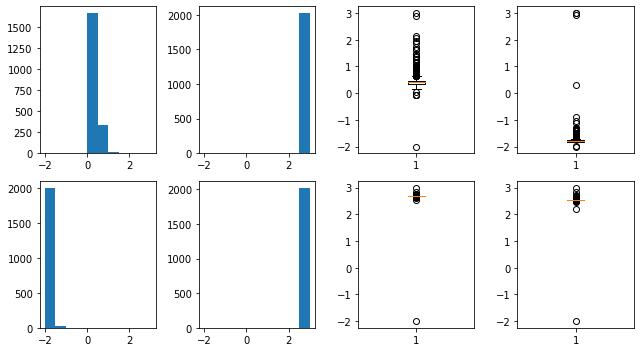

In [22]:
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(9,5))

axes[0, 0].hist(df[attribute_list[0]])
axes[0, 1].hist(df[attribute_list[1]])
axes[1, 0].hist(df[attribute_list[2]])
axes[1, 1].hist(df[attribute_list[3]])

axes[0, 2].boxplot(df[attribute_list[0]])
axes[1, 2].boxplot(df[attribute_list[1]])
axes[0, 3].boxplot(df[attribute_list[2]])
axes[1, 3].boxplot(df[attribute_list[3]])

figure.tight_layout()

In [23]:
df_no_out = df.copy() # copying dataframe and replacing outliers with lower impact values for better visualization of data

for c in df_no_out.columns[6:31]:

    q05 = df_no_out[c].quantile(0.10)
    q95 = df_no_out[c].quantile(0.90)
    iqr = q95 - q05 #Interquartile range
    fence_low  = q05-1.5*iqr
    fence_high = q95+1.5*iqr
    df_no_out.loc[df_no_out[c] > fence_high,c] = df_no_out[c].quantile(0.25)
    df_no_out.loc[df_no_out[c] < fence_low,c] = df_no_out[c].quantile(0.75)

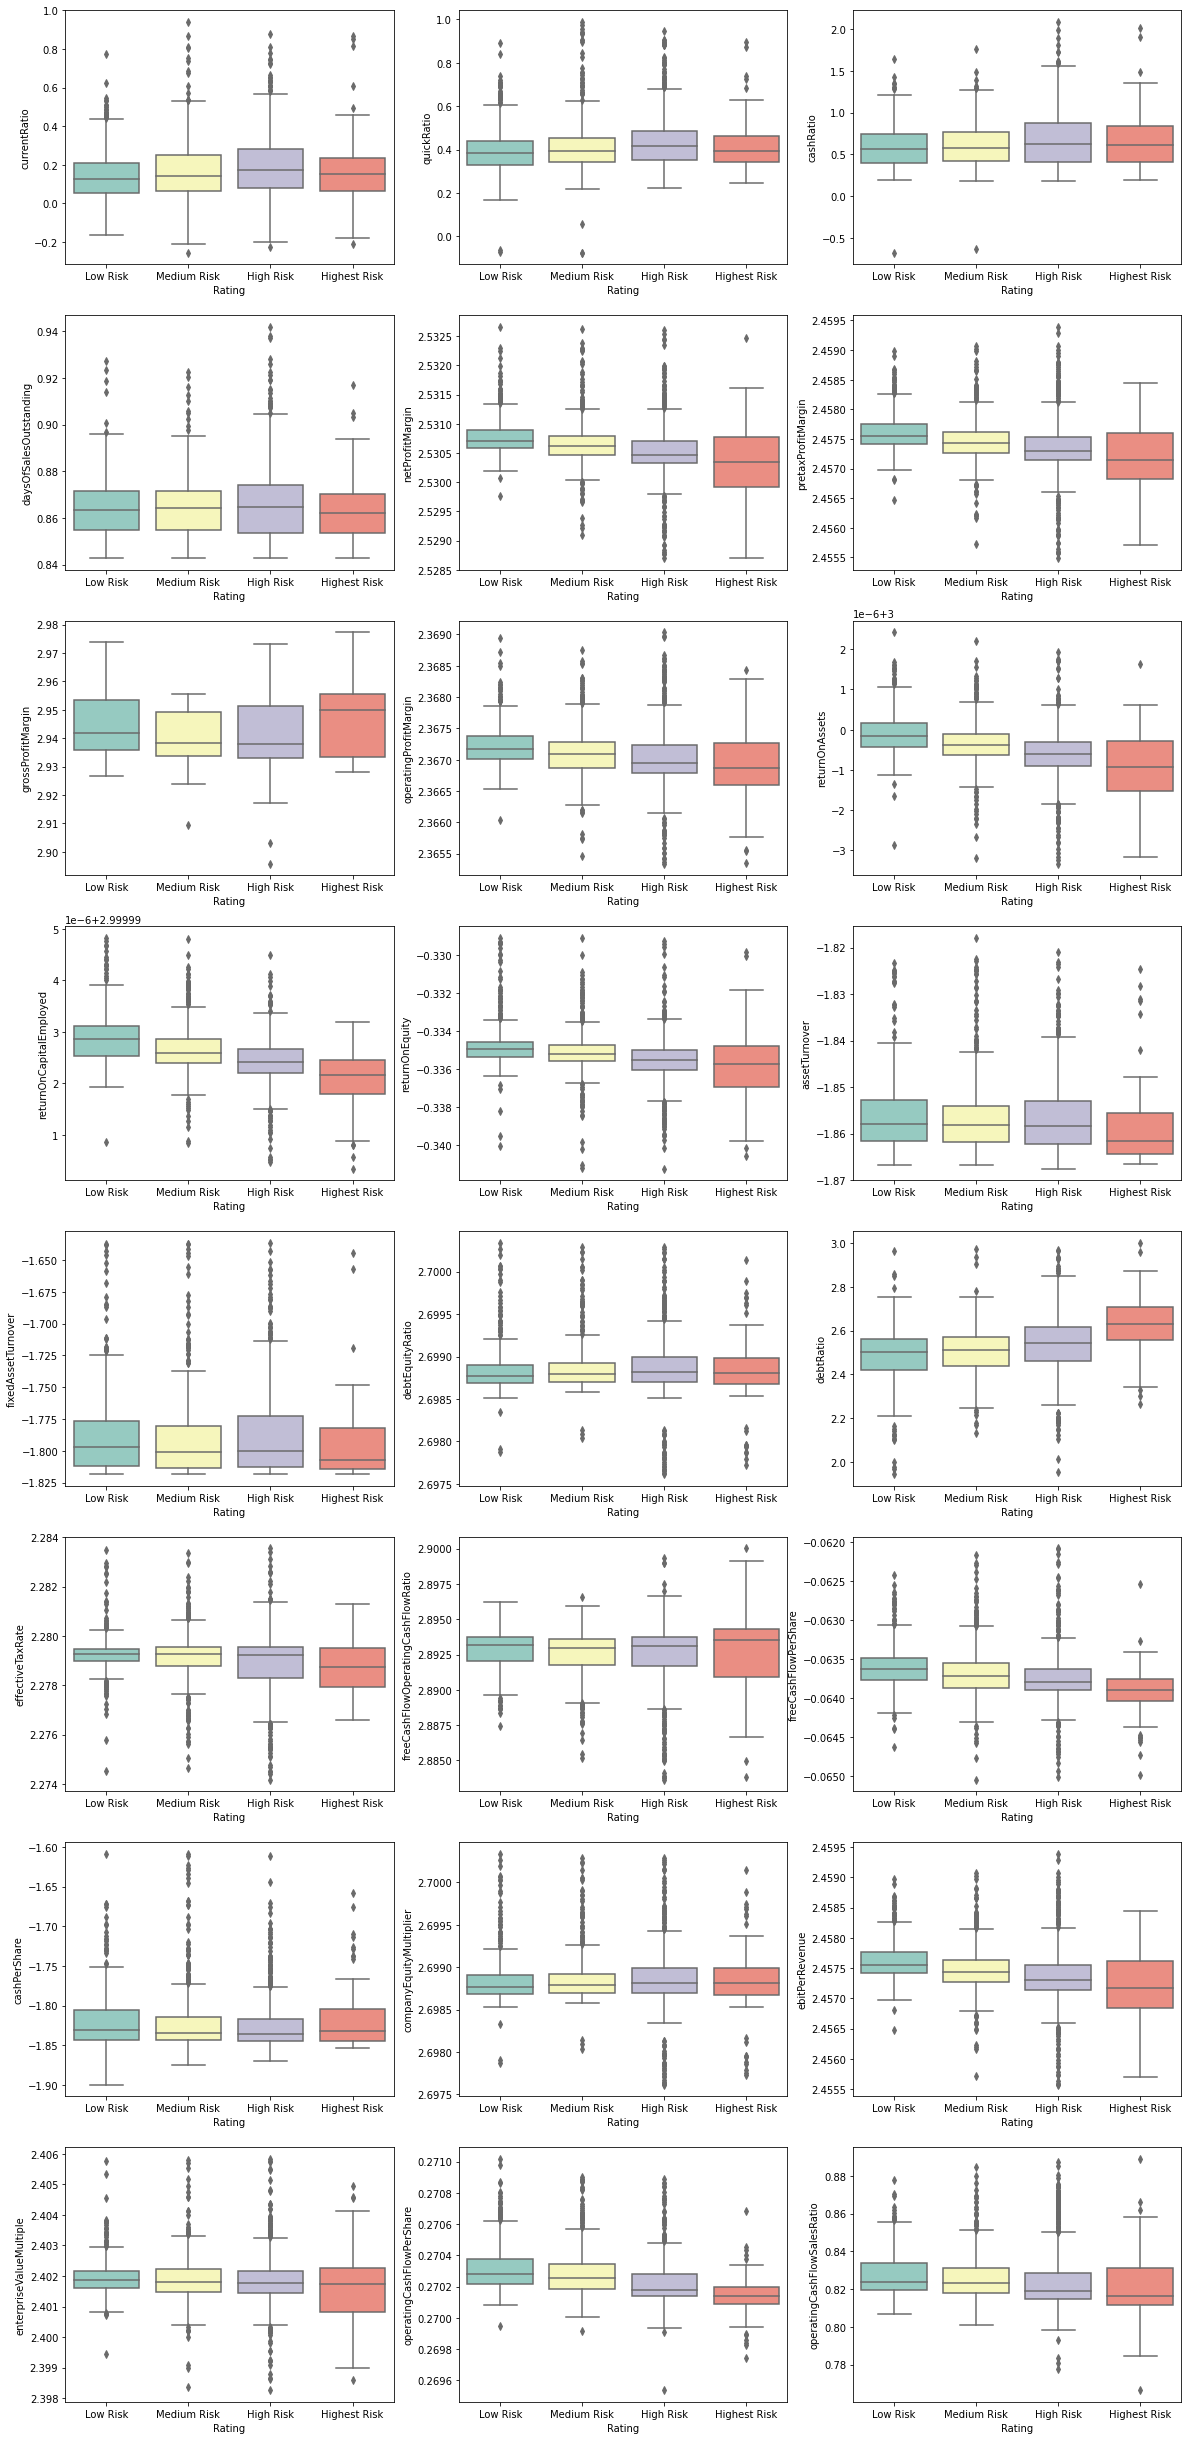

In [24]:
figure, axes = plt.subplots(nrows=8, ncols=3, figsize=(20,44))

i = 0 
j = 0

for c in df_no_out.columns[6:30]:
    
    sns.boxplot(x=df_no_out.Rating, y=df_no_out[c], palette="Set3", ax=axes[i, j])
    
    if j == 2:
        j=0
        i+=1
    else:
        j+=1  

In [25]:
df.colors = 'a' # assiging colors for each risk type i.e different ratings 
df_no_out.loc[df_no_out['Rating'] == 'Lowest Risk', 'color'] = 'r'
df_no_out.loc[df_no_out['Rating'] == 'Low Risk', 'color'] = 'g'
df_no_out.loc[df_no_out['Rating'] == 'Medium Risk', 'color'] = 'b'
df_no_out.loc[df_no_out['Rating'] == 'High Risk','color'] = 'y'
df_no_out.loc[df_no_out['Rating'] == 'Highest Risk', 'color'] = 'm'

In [26]:
attribute_list = list(df.columns[6:31]) # plotting for visual representation
attribute_list = sample(attribute_list,12) 

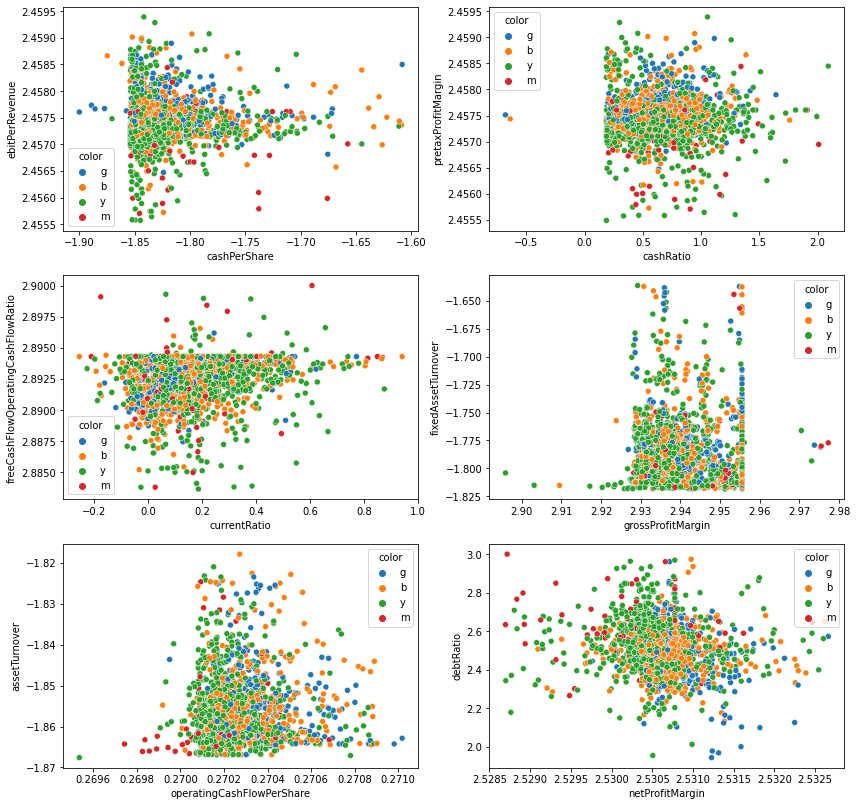

In [27]:
figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,14))

i = 0 
j = 0

for c in range(0,12, 2):

    sns.scatterplot(x = attribute_list[c], y=attribute_list[c+1], hue="color", data=df_no_out, ax=axes[j,i])
    
    if i == 1:
        i = 0
        j +=1
    
    else:
        i+=1

In [28]:
le = preprocessing.LabelEncoder() # preparing data for training and testing 
le.fit(df.Sector)
df.Sector = le.transform(df.Sector) # encode sector
le.fit(df.Rating)
df.Rating = le.transform(df.Rating) # encode rating

In [48]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state = 1234 , shuffle = True)

In [49]:
X_train, y_train = df_train.iloc[:,5:31], df_train.iloc[:,0]
X_test, y_test = df_test.iloc[:,5:31], df_test.iloc[:,0]

In [50]:
gradient = GradientBoostingClassifier(random_state=123) # gradient boosting method 
gradient.fit(X_train, y_train)
pred_gradient = gradient.predict(X_test)
Accuracy_g = metrics.accuracy_score(y_test, pred_gradient)
print("Gradient Boosting Accuracy:",Accuracy_g)

Gradient Boosting Accuracy: 0.6320987654320988


In [51]:
random = RandomForestClassifier(random_state=123) # random forest method 
random.fit(X_train, y_train)
pred_rand = random.predict(X_test)
Accuracy_r = metrics.accuracy_score(y_test, pred_rand)
print("Random Forest Accuracy:",Accuracy_r)

Random Forest Accuracy: 0.6370370370370371


In [52]:
naive = GaussianNB()    # naive bayes
naive.fit(X_train, y_train)
pred_naive = naive.predict(X_test)
Accuracy_n = metrics.accuracy_score(y_test, pred_naive)
print("Naive bayes Accuracy:",Accuracy_n)

Naive bayes Accuracy: 0.30864197530864196


In [53]:
KN = KNeighborsClassifier(n_neighbors=3)    # KNN
KN.fit(X_train,y_train)
pred_KN = KN.predict(X_test)
Accuracy_k= metrics.accuracy_score(y_test, pred_KN)
print("K-nearest neighbour Accuracy:",Accuracy_k)

K-nearest neighbour Accuracy: 0.5802469135802469
